**Information**: *Brief introduction to Tensor in PyTorch, automatic differentiation theory, how to use AutoGrad in PyTorch and two simple examples*

**Written by**: *Zihao Xu*

**Last update date**: *06.09.2021*

# Data Manipulation via PyTorch
- The $n$-dimensional array is usually called the tensor
- *tensor* class in Pytorch is similar to *NumPy*'s *ndarray* with several additional features
    - GPU is well-supported to accelerate the computation whereas *NumPy* only supports CPU computation
    - *tensor* class supports automatic differentiation
- The [Pytorch documentation](https://pytorch.org/docs/master/torch.html) shows the full attributes

## Create a tensor
- To get started, import **torch**. Although it's called PyTorch, we should import **torch** instead of pytorch

In [1]:
import torch
# Check the version of a module
print(torch.__version__)

1.8.1


- Common ways to creating a tensor
    - torch.arange(start,end,step)
    - torch.zeros(shape)
    - torch.ones(shape)
    - torch.randn(shape)
    - torch.tensor(elements)

In [2]:
torch.arange(0, 12, 1)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [3]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
torch.ones((2, 5))

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [5]:
torch.randn(10)

tensor([ 0.1626, -0.9563,  1.0995,  0.8781,  0.5974,  0.1148,  0.2608,  1.3726,
         0.8922, -0.6782])

In [6]:
torch.tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

- One can access a tensor's shape by viewing the **shape** attribute

In [7]:
torch.ones((4, 5)).shape

torch.Size([4, 5])

- **reshape** method can change the shape of a tensor without altering either the number of elements or their values.
    - No need to manually specify every dimension
    - Can place $-1$ for the dimension that we would like tensors to automatically infer

In [8]:
torch.arange(12).reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.arange(12).reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

## Type of a tensor
- Usually, a tensor is created as **tensor.float32** (32-bit floating point) by default. One can view its type in the **dtype** attribute
    - When creating a tensor using **torch.tensor**, tensor with all integers would be created as **torch.int64** (64-bit signed integer)
- Full tensor types can be viewed in the [documentation](https://pytorch.org/docs/master/tensor_attributes.html#torch.torch.dtype)

In [10]:
torch.ones(10).dtype

torch.float32

In [11]:
torch.tensor([[1, 2, 3], [4, 5, 6]]).dtype

torch.int64

In [12]:
# Only add one dot after the first element
torch.tensor([[1., 2, 3], [4, 5, 6]]).dtype

torch.float32

- One can assign the wanted type when creating the tensor by setting the **dtype** attribute to
    - *torch.float32*, 32-bit floating point
    - *torch.float64*, 64-bit floating point
    - *torch.uint8*, 8-bit unsigned integer
    - *torch.int8*, 8-bit signed integer
    - *torch.int32*, 32-bit signed integer
    - *torch.int64*, 64-bit signed integer
    - *torch.bool*, Boolean

In [13]:
torch.ones(10, dtype=torch.float64).dtype

torch.float64

In [14]:
torch.ones(10, dtype=torch.uint8).dtype

torch.uint8

In [15]:
torch.ones(10, dtype=torch.int32).dtype

torch.int32

- One can also construct the type of a tensor from list or numpy array using the method:
    - *FloatTensor*, 32-bit floating point
    - *DoubleTensor*, 64-bit floating point
    - *ByteTensor*, 8-bit unsigned integer
    - *CharTensor*, 8-bit signed integer
    - *IntTensor*, 32-bit signed integer
    - *LongTensor*, 64-bit signed integer
    - *BoolTensor*, Boolean

In [16]:
torch.DoubleTensor([1, 2, 3]).dtype

torch.float64

In [17]:
torch.ByteTensor([1, 2, 3]).dtype

torch.uint8

## Use GPU for tensor computation
- Unless otherwise specified, a new tensor will be stored in main memory and designated for CPU-based computation
- One can check which device the tensor is designated for by viewing the **device** attribute

In [18]:
torch.ones(10).device

device(type='cpu')

- One can always set the create a device if a GPU supporting cuda is available and use **to(device)** method to determine the device on which a tensor is or will be allocated
    - Assign the **device** parameter when creating a tensor also works

In [19]:
cuda0 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cuda0

device(type='cuda', index=0)

In [20]:
torch.ones(5, device=cuda0)

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [21]:
# If available, indexing the cuda also works
torch.ones(5, device=0)

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [22]:
# If avaiable, the string also works
torch.ones(5, device="cuda:0")

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [23]:
# Use the to method the move a tensor
x = torch.ones(5).to(cuda0)
x

tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [24]:
# One can also move a tensor from GPU to CPU
x.to("cpu").device

device(type='cpu')

## Operations
- Common standard arithmetic operators have all been lifted to element-wise operations

In [25]:
x = torch.tensor([1., 2., 4., 8.])
c = 1.
x + c, x * c, x**c

(tensor([2., 3., 5., 9.]), tensor([1., 2., 4., 8.]), tensor([1., 2., 4., 8.]))

In [26]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.tensor([4., 3., 2., 1.])
x + y, x * y, x**y

(tensor([5., 5., 6., 9.]),
 tensor([4., 6., 8., 8.]),
 tensor([ 1.,  8., 16.,  8.]))

In [27]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

- Matrix multiplication is also supported

In [28]:
A = torch.randn((4, 3))
B = torch.randn((3, 5))
# Two ways of matrix multiplication
torch.mm(A, B), A @ B

(tensor([[-1.9090,  4.4974, -0.7523,  2.8361, -2.4656],
         [-0.7529,  0.9086,  0.8353,  0.1293,  0.1171],
         [-0.7998,  1.4260,  2.3517,  1.2654,  0.0200],
         [ 2.2119, -5.1211, -1.6146, -3.8720,  2.1983]]),
 tensor([[-1.9090,  4.4974, -0.7523,  2.8361, -2.4656],
         [-0.7529,  0.9086,  0.8353,  0.1293,  0.1171],
         [-0.7998,  1.4260,  2.3517,  1.2654,  0.0200],
         [ 2.2119, -5.1211, -1.6146, -3.8720,  2.1983]]))

In [29]:
A = torch.randn((5, 4))
B = torch.randn((5, 4))
# Two ways of elementwise multiplication
torch.mul(A, B), A * B

(tensor([[-1.5337,  0.5801, -0.0622,  0.1134],
         [-0.0442, -0.2856, -0.1522,  0.0301],
         [-1.4391, -0.2859, -0.1268,  0.1497],
         [ 0.4119, -1.3713, -0.1635,  0.3135],
         [ 0.3121, -0.7067, -0.0231, -2.0135]]),
 tensor([[-1.5337,  0.5801, -0.0622,  0.1134],
         [-0.0442, -0.2856, -0.1522,  0.0301],
         [-1.4391, -0.2859, -0.1268,  0.1497],
         [ 0.4119, -1.3713, -0.1635,  0.3135],
         [ 0.3121, -0.7067, -0.0231, -2.0135]]))

- We can also **concatenate** multiple tensors together, stacking them end-to-end to form a larger tensor. We just need to provide a list of tensors and tell the system along which axis to concatenate. 

In [30]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = torch.ones((3, 4))
# dim stands for the index of dimension in which the tensors are concatenated
torch.cat((A, B), dim=0), torch.cat((A, B), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  1.,  1.,  1.],
         [ 4.,  5.,  6.,  7.,  1.,  1.,  1.,  1.],
         [ 8.,  9., 10., 11.,  1.,  1.,  1.,  1.]]))

- Also, we can construct a binary tensor via logical statements

In [31]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = 5 * torch.ones((3, 4))
A == B, A > B

(tensor([[False, False, False, False],
         [False,  True, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [False, False,  True,  True],
         [ True,  True,  True,  True]]))

## Broadcasting Mechanism
- Under certain conditions, even shapes differ, we can still perform **element-wise** operations by invoking the **broadcasting mechanism**.
    - First, expand one or both arrays by copying elements appropriately so that after this transformation, the two tensors have the same shape.
    - Second, carry out the element-wise operation on the resulting arrays
- In most cases, we broadcast along an axis where an array initially only has length 1

In [32]:
a = torch.arange(3).reshape(3, 1)
b = torch.arange(2).reshape(1, 2)
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

## Indexing and Slicing
- As in standard Python lists, we can access elements according to their relative position to the end of the list by using negative indices

In [33]:
X = torch.arange(16).reshape(4, 4)
X, X[-1], X[1:3]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]]),
 tensor([12, 13, 14, 15]),
 tensor([[ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]))

- Can also index using binary tensor

In [34]:
A = torch.arange(0, 12, 1).reshape((3, 4))
B = 5 * torch.ones((3, 4))
A, B, A[A > B]

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[5., 5., 5., 5.],
         [5., 5., 5., 5.],
         [5., 5., 5., 5.]]),
 tensor([ 6,  7,  8,  9, 10, 11]))

%%latex
\newpage

# Automatic Calculation of Gradients
- In practice, based on our designed model, the system builds a **computational graph**, tracking which data combined through which operations to produce the output. Automatic differentiation enables the system to subsequently **backpropagate gradients**.
    - Here *backpropagate* simply means to trace through the computational graph, filling in the partial derivatives with respect to each parameter

## Intuition
- All computation can be broken into simple components
    - sum
    - multiply
    - exponential
    - convolution
    - ...
- Derivatives for each simple component can be derived mathematically
- Derivatives for **any composition** can be derived via **chain rule**

## Automatic Differentiation - Forward Mode
- **Notice:** Here is only my naive understanding about automatic differentiation since I haven't found some detailed mathematical explanation about it.
- One naive way of find the partial derivative respect to $i$-th variable $\frac{\partial f}{\partial x_i}$ in the function $$f=f(x_1,x_2,\cdots,x_n)$$ the simplest way is to **construct** the chain rule ($\frac{\partial f}{\partial t}$ is actually meaningless in this context) $$\frac{\partial f}{\partial t}=\underset{j=1}{\overset{n}{\Sigma}}\frac{\partial f}{\partial x_j}\frac{\partial x_j}{\partial t}$$ by setting $$\frac{\partial x_j}{\partial t}=\left\{\begin{aligned}&1&j=i\\&0&j\ne i\end{aligned}\right.$$ we get $$\frac{\partial f}{\partial t}=\frac{\partial f}{\partial x_i}$$
- That is to say, for each **decomposed simple operation**, the computer does not only calculate the **output**, but also tracks the **derivatives of output respect to time** based on the input value and input derivative, thus **step by step** getting the final derivative respect to time, which is equal to the partial derivative
- Since the computation is **straight forward**, this method to calculate partial derivative is called **forward mode**.
- For example, for a function $$f(x_1,x_2)=\text{ln}(x_1)+x_1x_2-\text{sin}(x_2)$$ Decompose the function into simple operation nodes $$\begin{aligned}v_{-1}&=x_1\\v_0&=x_2\\v_1&=\text{ln}v_{-1}\\v_2&=v_{-1}\times v_0\\v_3&=\text{sin}v_0\\v_4&=v_1+v_2\\v_5&=v_4-v_3\\y&=v_5\end{aligned}$$The forward mode computation graph is shown below

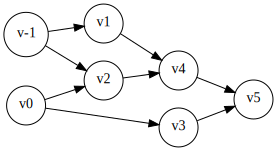

In [35]:
from graphviz import Digraph

f = Digraph('ComputationGraph')
f.attr(rankdir='LR')
f.attr('node', shape='circle')
f.node('v_-1', label='<v<sub>-1</sub>>')
f.node('v_0', label='<v<sub>0</sub>>')
f.node('v_1', label='<v<sub>1</sub>>')
f.node('v_2', label='<v<sub>2</sub>>')
f.node('v_3', label='<v<sub>3</sub>>')
f.node('v_4', label='<v<sub>4</sub>>')
f.node('v_5', label='<v<sub>5</sub>>')
f.edge('v_-1', 'v_1')
f.edge('v_-1', 'v_2')
f.edge('v_0', 'v_2')
f.edge('v_0', 'v_3')
f.edge('v_1', 'v_4')
f.edge('v_2', 'v_4')
f.edge('v_4', 'v_5')
f.edge('v_3', 'v_5')
f

- To find the **partial derivate** $\frac{\partial f}{\partial x_1}$ when $x_1=2,x_2=5$, compute along the **forward evaluation trace**  first:$$\begin{aligned}v_{-1}&=&x_1&=&2\\v_{0}&=&x_2&=&5\\v_1&=&\text{ln}v_{-1}&=&\text{ln}2\\v_2&=&v_{-1}\times v_0&=&2\times 5\\v_3&=&\text{sin}v_0&=&\text{sin}5\\v_4&=&v_1+v_2&=&0.693+10\\v_5&=&v_4-v_3&=&10.693+0.959\\y&=&v_5&=&11.652\end{aligned}$$ Then set $\dot{x_1}=1,\ \dot{x_2}=0$ and compute along the **forward derivative trace** (maybe also computed simultaneously along with the forward evaluation trace)$$\begin{aligned}\dot{v}_{-1}&=&\dot{x}_1&=&1\\ \dot{v}_{0}&=&\dot{x}_2&=&0\\ \dot{v}_1&=&\dot{v}_{-1}/v_{-1}&=&1/2\\ \dot{v}_2&=&\dot{v}_{-1}\times v_0+\dot{v}_0\times v_{-1}&=&1\times 5 +0\times 2\\ \dot{v}_3&=&\dot{v}_0\times\text{cos}v_0&=&0\times\text{cos}5\\ \dot{v}_4&=&\dot{v}_1+\dot{v}_2&=&0.5+5\\ \dot{v}_5&=&\dot{v}_4-\dot{v}_3&=&5.5-0\\ \dot{y}&=&\dot{v}_5&=&5.5\end{aligned}$$ Therefore, the result is $$\frac{\partial f}{\partial x_1}=\frac{\partial f}{\partial t}=5.5$$ If $\frac{\partial f}{\partial x_2}$ is also interested, the **forward derivative trace** needs to be computed again when setting $\dot{x}_1=0,\dot{x}_2=1$
- **Comments**:
    - For a function $f:\mathbb{R}^n\Rightarrow\mathbb{R}^m$ with input $\mathbf{x}\in\mathbb{R}^n$ and output $\mathbf{y}\in\mathbb{R}^m$, needs to calculate $n$ times along the **forward derivative trace** for the partial derivatives $$\frac{\partial \mathbf{y}}{\partial x_j},\ j=1,2,\cdots,n$$ by sequentially setting $$\frac{\partial x_j}{\partial t}=\left\{\begin{aligned}&1&j=i\\&0&j\ne i\end{aligned}\right.,\ i=1,2,\cdots,n$$ and only one time along the **forward evaluation trace** for the $m$-dimension output values $$y_1,y_2,\cdots,y_m$$
    - Get the partial derivatives of **all outputs** respect to **one variable** after computing along the derivative trace once
    - **High efficiency** when $n<<m$
    - **Low efficiency** when $n>>m$, which is common in machine learning and deep learning

## Automatic differentiation - Reverse Mode
- Motivated by the **low efficiency** of *forward mode* when the derivatives of multiple variables are interested
    - In machine learning and deep learning, usually the dimension of input parameters are huge (such as $10^6$) while the dimension of output is usually 1 (focusing on the loss function which produce a scalar)
- To find the partial derivative respect to $i$-th variable $\frac{\partial f}{\partial x_i}$ in the function $$f=f(x_1,x_2,\cdots,x_n)$$ we can always decompose the function into simple operation nodes $$v_1,v_2,\cdots,v_p$$ such that we can find some nodes $v_c,c\in[1,M]$ to compose the derivative $$\frac{\partial y}{\partial x_i}=\frac{\partial y}{\partial v_{c_q}}\frac{\partial v_{c_{q}}}{\partial v_{c_{q-1}}}\cdots\frac{\partial v_{c_2}}{\partial v_{c_1}}\frac{\partial v_{c_1}}{\partial x_i}$$ Denote $$\bar{v}_c=\frac{\partial y}{\partial v_{c}}$$ The idea is to first compute following the **forward evaluation trace** same as that in *forward mode* while recording the **relationship** (such as the differential equation) between nodes, then sequentially calculate $$\bar{v}_{c_q}=\frac{\partial y}{\partial v_{c_q}},\bar{v}_{c_{q-1}}=\bar{v}_{c_q}\frac{\partial v_{c_q}}{\partial v_{c_{q-1}}},\cdots,\frac{\partial f}{\partial x_i}=\bar{v}_{c_1}\frac{\partial v_{c_1}}{\partial x}$$
- The example is still to find the partial derivatives at $x_1=2,x_2=5$ of the function $$f(x_1,x_2)=\text{ln}(x_1)+x_1x_2-\text{sin}(x_2)$$ Similarly, decompose the function into simple operation nodes $$\begin{aligned}v_{-1}&=x_1\\v_0&=x_2\\v_1&=\text{ln}v_{-1}\\v_2&=v_{-1}\times v_0\\v_3&=\text{sin}v_0\\v_4&=v_1+v_2\\v_5&=v_4-v_3\\y&=v_5\end{aligned}$$ The **forward evaluation computation graph** would be the same of that in *forward mode*. Here show the **reverse adjoint computation graph**

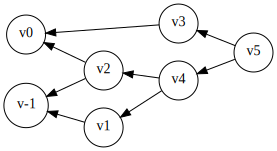

In [36]:
f = Digraph('ComputationGraph')
f.attr(rankdir='RL')
f.attr('node', shape='circle')
f.node('v_-1', label='<v<sub>-1</sub>>')
f.node('v_0', label='<v<sub>0</sub>>')
f.node('v_1', label='<v<sub>1</sub>>')
f.node('v_2', label='<v<sub>2</sub>>')
f.node('v_3', label='<v<sub>3</sub>>')
f.node('v_4', label='<v<sub>4</sub>>')
f.node('v_5', label='<v<sub>5</sub>>')
f.edge('v_1', 'v_-1')
f.edge('v_2', 'v_-1')
f.edge('v_2', 'v_0')
f.edge('v_3', 'v_0')
f.edge('v_4', 'v_1')
f.edge('v_4', 'v_2')
f.edge('v_5', 'v_4')
f.edge('v_5', 'v_3')
f

- First, compute along the **forward evaluation trace** $$\begin{aligned}v_{-1}&=&x_1&=&2\\v_{0}&=&x_2&=&5\\v_1&=&\text{ln}v_{-1}&=&\text{ln}2\\v_2&=&v_{-1}\times v_0&=&2\times 5\\v_3&=&\text{sin}v_0&=&\text{sin}5\\v_4&=&v_1+v_2&=&0.693+10\\v_5&=&v_4-v_3&=&10.693+0.959\\y&=&v_5&=&11.652\end{aligned}$$ Then compute along the **reverse adjoint trace** $$\begin{aligned}\bar{v}_5&=&\frac{\partial y}{\partial v_5}&=&1&\ &\\ \bar{v}_4&=&\bar{v}_5\frac{\partial v_5}{\partial v_4}&=&\bar{v}_5\times 1&=&1\\ \bar{v}_3&=&\bar{v}_5\frac{\partial v_5}{\partial v_3}&=&\bar{v}_5\times(-1)&=&-1\\ \bar{v}_1&=&\bar{v}_4\frac{\partial v_4}{\partial v_1}&=&\bar{v}_4\times 1&=&1\\ \bar{v}_2&=&\bar{v}_4\frac{\partial v_4}{\partial v_2}&=&\bar{v}_4\times 1&=&1\\ \bar{v}_0&=&\bar{v}_2\frac{\partial v_2}{\partial v_0}+\bar{v}_3\frac{\partial v_3}{\partial v_0}&=&\bar{v}_2\times v_{-1}+\bar{v}_3\times\text{cos}v_0&=&1.716\\ \bar{v}_{-1}&=&\bar{v}_1\frac{\partial v_1}{\partial v_{-1}}+\bar{v}_2\frac{\partial v_2}{\partial v_{-1}}&=&\bar{v}_1\times\frac{1}{v_{-1}}+\bar{v}_2\times v_0&=&5.5\end{aligned}$$ Therefore, the result is $$\begin{aligned}\frac{\partial f}{\partial x_1}&=&\bar{v}_{-1}&=&5.5\\\frac{\partial f}{\partial x_2}&=&\bar{v}_0&=&1.716\end{aligned}$$
- **Comments**: 
    - For a function $f:\mathbb{R}^n\Rightarrow\mathbb{R}^m$ with input $\mathbf{x}\in\mathbb{R}^n$ and output $\mathbf{y}\in\mathbb{R}^m$, needs to calculate $m$ times along the **reverse adjoint trace**
    - Get the partial derivatives of **one output** respect to **all variables** after computing along the reverse adjoint trace once
        - Fits the idea of calculating **gradients**
    - **High efficiency** when $n>>m$
    - **Low efficiency** when $n<<m$
    - Frequently used in ML/DL tasks and is supported by PyTorch, Tensorflow, ...

## Computation graph and AutoGrad in PyTorch
- As mentioned above, PyTorch supports **reverse mode automatic differentiation**
    - PyTorch automatically creates a computation graph if **requires_grad=True**
    - For a given variable with **requires_grad=True**, identify the operations and record the required information for reverse adjoint trace computation
    - Can be checked by viewing the **requires_grad** attributes of independent variables
    - Use the **make\_dots** method from **torchviz** module to visualize the computation graph
        - Need support from **graphviz**
- Some comments:
    - PyTorch's computational graphs are **dynamic**, in the sense that a new graph is created in each forward pass. On the other hand, the computational graphs constructed by Tensorflow are **static**, in the sense that the same graph is used over and over in all iterations during training
    - In general, static graphs are more efficient because it only needs to be optimized once. Optimization generally consists of distributing the computations over the graph nodes across multiple GPUs if more than one GPU is available, or just fusing some nodes of the graph if the result logic won't be impacted by such fusion
    - However, static graphs do not lend themselves well to recurrent neural computations because the graph itself can change from iteration to iteration

In [37]:
# The default setting is requires_grad = False
x = torch.tensor(5.)
y = 3 * x**2 + x
print(x, x.requires_grad)
print(y, y.requires_grad)

tensor(5.) False
tensor(80.) False


tensor(5., requires_grad=True) True
tensor(76.1643, grad_fn=<AddBackward0>) True


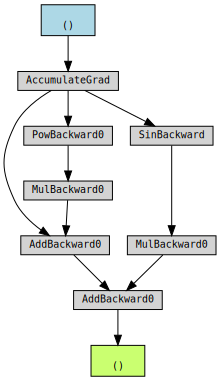

In [38]:
# Use the torchviz module for visualization
from torchviz import make_dot

x = torch.tensor(5., requires_grad=True)
y = 3 * x**2 + x + 4 * torch.sin(x)
# Independent variable would show the requires_grad attribute
print(x, x.requires_grad)
# Dependent variable would show the grad_fn attribute
print(y, y.requires_grad)
make_dot(y)

- Notice the **grad_fn** attribute. Tensor use this attribute to do the backwards computation.
- When the dimension of input tensor is greater than one, the dimension of each step would also show on the graph
    - Very useful when building neural networks

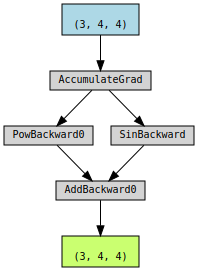

In [39]:
x = torch.randn((3, 4, 4), requires_grad=True)
y = x**2 + torch.sin(x)
make_dot(y)

- One can access the gradient by calling **backward()** method
- After invoke **backward()** method on the dependent variable we are interested in, the partial derivative would automatically be returned to the **grad** attribute of variables contributed to that dependent variable
- For **independent** variables, we can directly call **backward()** method and see the gradients
- In the following case: $$z=x_1^2+x_2^2$$ The partial derivatives at $x_1=5,x_2=2$ are $$\frac{\partial z}{\partial x_1}=2x_1=10,\frac{\partial z}{\partial x_2}=2x_2=4$$

In [40]:
x_1 = torch.tensor(5., requires_grad=True)
x_2 = torch.tensor(2., requires_grad=True)
z = x_1**2 + x_2**2
z.backward()
print(x_1, x_1.grad)
print(x_2, x_2.grad)
print(z)

tensor(5., requires_grad=True) tensor(10.)
tensor(2., requires_grad=True) tensor(4.)
tensor(29., grad_fn=<AddBackward0>)


- For **intermediate dependent** variables (*non-leaf tensor* in pytorch documentation) used in computation, the gradient value is usually not considered and would be cleared after the computation along reverse adjoint trace.
- If the value is indeed needed, the **retain_grad()** method should be invoked

In [41]:
x_1 = torch.tensor(5., requires_grad=True)
x_2 = torch.tensor(2., requires_grad=True)
y = 0.5 * x_2**2
y.retain_grad()
z = x_1**2 + y
z.backward()
print(x_1, x_1.grad)
print(x_2, x_2.grad)
print(y, y.grad)
print(z)

tensor(5., requires_grad=True) tensor(10.)
tensor(2., requires_grad=True) tensor(2.)
tensor(2., grad_fn=<MulBackward0>) tensor(1.)
tensor(27., grad_fn=<AddBackward0>)


- It needs to be noticed that the gradients accumulate when calling **backward()**

In [42]:
x = torch.tensor(5., requires_grad=True)
for ii in range(2):
    y = 3 * x**2
    y.backward()
    print(x, x.grad)
    print(y)

tensor(5., requires_grad=True) tensor(30.)
tensor(75., grad_fn=<MulBackward0>)
tensor(5., requires_grad=True) tensor(60.)
tensor(75., grad_fn=<MulBackward0>)


- Therefore, when calculating the gradients repeated in loops, we usually need to **zero** the gradients before calling **backward()** method, by calling **zero_()** method

In [43]:
x = torch.tensor(5., requires_grad=True)
for ii in range(2):
    try:
        x.grad.zero_()
    except Exception as e:
        print(e)
    y = 3 * x**2
    y.backward()
    print(x, x.grad)
    print(y)

'NoneType' object has no attribute 'zero_'
tensor(5., requires_grad=True) tensor(30.)
tensor(75., grad_fn=<MulBackward0>)
tensor(5., requires_grad=True) tensor(30.)
tensor(75., grad_fn=<MulBackward0>)


- Sometimes, we would need to call the **backward()** method multiple times, like using MSE loss and Cross-Entropy loss separately for localization and detection in CV. In this case, **retain_graph** should be set to **True** except in the last **backward()** method if any **intermediate dependent variables** are used.

In [44]:
x = torch.tensor(5., requires_grad=True)
y = x**2
z_1 = x + y
z_2 = x**2 + y
z_3 = x**3 + y
z_1.backward(retain_graph=True)
z_2.backward(retain_graph=True)
z_3.backward()
print(x, x.grad)

tensor(5., requires_grad=True) tensor(116.)


- Generally speaking, PyTorch can compute gradients for any number of parameters and any complex functions

In [45]:
x = torch.arange(5.).requires_grad_(True)
y = torch.sum(x**2)
y.backward()
print(x)
print(y)
print(x.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True)
tensor(30., grad_fn=<SumBackward0>)
tensor([0., 2., 4., 6., 8.])


In [46]:
x = torch.arange(5.).requires_grad_(True)
y = torch.mean(torch.log(x**2 + 1) + 5 * x)
y.backward()
print(x)
print(y)
print(x.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True)
tensor(11.4877, grad_fn=<MeanBackward0>)
tensor([1.0000, 1.2000, 1.1600, 1.1200, 1.0941])


%%latex
\newpage

# Simple Gradient Descent example
- To show how automatic gradient in PyTorch and the simple gradient descent algorithm work, here are two examples where the input and output are both $1$-dimension variables
- For convenience, define the gradient descent algorithm as a function and the visualization process as a function

In [47]:
import matplotlib.pyplot as plt
import numpy as np


# Function of simple gradient descent
def gradient_descent(objective, step_size=0.05, max_iter=100, init=0):
    # Initialize
    x_hat = torch.tensor(init, dtype=torch.float32, requires_grad=True)
    # Record the value iteration process
    x_hat_arr = [x_hat.detach().numpy().copy()]
    obj_arr = [objective(x_hat).detach().numpy()]
    # Iterate
    for ii in range(max_iter):
        # Compute gradient
        if x_hat.grad is not None:
            x_hat.grad.zero_()
        out = objective(x_hat)
        out.backward()
        # Update x_hat
        # Stop tracking gradients
        with torch.no_grad():
            x_hat -= step_size * x_hat.grad
        x_hat_arr.append(x_hat.detach().numpy().copy())
        obj_arr.append(objective(x_hat).detach().numpy())
    return np.array(x_hat_arr), np.array(obj_arr)


# Function to visualize iteration process
def visualize_result(x_arr, obj_arr, objective, x_true=None, vis_arr=None):
    # The horizontal range of figure
    if vis_arr is None:
        vis_arr = np.linspace(np.min(x_arr), np.max(x_arr))
    fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
    ax.plot(vis_arr, [objective(torch.tensor(x)).numpy() for x in vis_arr],
            label='Objective')
    ax.plot(x_arr, obj_arr, 'o-', label='Gradient Steps')
    # If true minimum location is provided, plot it out
    if x_true is not None:
        ax.plot(np.ones(2) * x_true, plt.ylim(), label='True x')
    ax.plot(np.ones(2) * x_arr[-1], plt.ylim(), label='Final x')
    plt.legend(loc='lower right')
    plt.show()

## Convex function - Converge to global minimum
- Here is an example where the objective function is very simple and gradient descent can easily reach the global minimum
- First plot out the objective function

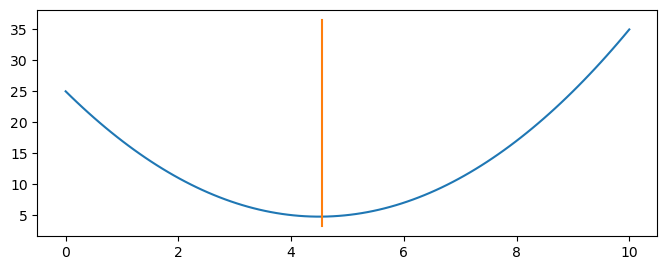

In [48]:
# Objective function
def Objective(x):
    return torch.abs(x) + (x - 5)**2


x = torch.linspace(0, 10, 100)
y = Objective(x)
x_true = float(x[np.argmin(y)])
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
# Need to convert the tensor to numpy arrays for plots
ax.plot(x.numpy(), y.numpy())
# Show the minimum location
ax.plot(x_true * np.ones(2), plt.ylim())
plt.show()

- Apply simple gradient descent on this function

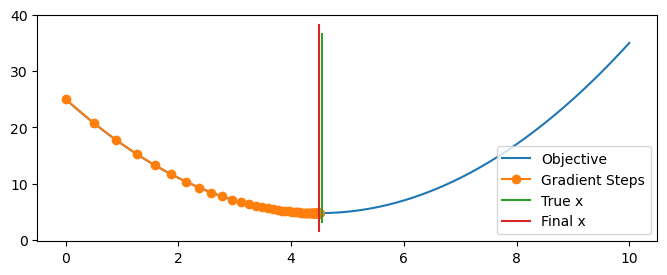

In [49]:
# Call the functions to get the minimum
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.05,
                                      max_iter=150,
                                      init=0)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(0, 10, num=100))

- It seems that the final value approximately reaches the global minimum. Let's check the result by printing them out

In [50]:
print("The true minimum location is:              %f" % (x_true))
print("The final location got by GD is:           %f" % (x_hat_arr[-1]))
print("Errors between true and final location is: %f" %
      (x_true - x_hat_arr[-1]))

The true minimum location is:              4.545455
The final location got by GD is:           4.499998
Errors between true and final location is: 0.045456


- In this case, the start point does **not** matter

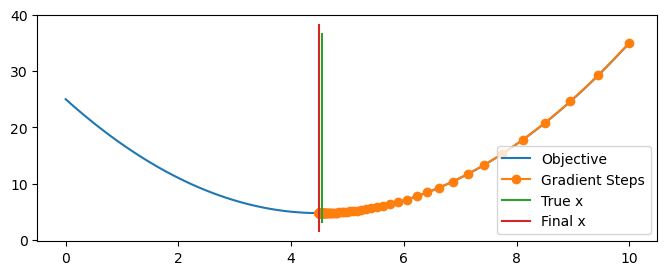

In [51]:
# Call the functions to get the minimum
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.05,
                                      max_iter=150,
                                      init=10)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(0, 10, num=100))

## Non convex function - Converge to local minimum
- Here is an example where the objective function is a bit complex and gradient descent falls into local minimum
- First plot out the objective function

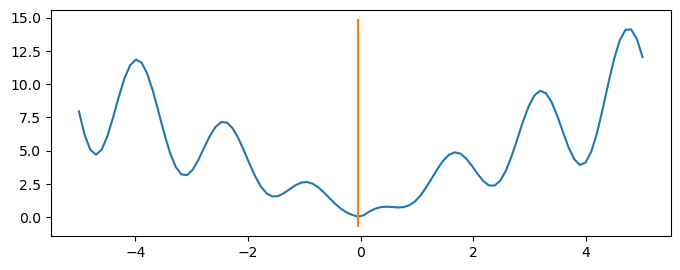

In [52]:
def Objective(x):
    return x * torch.cos(4 * x) + 2 * torch.abs(x)


x = torch.linspace(-5, 5, 100)
y = Objective(x)
x_true = float(x[np.argmin(y)])
fig, ax = plt.subplots(figsize=(8, 3), dpi=100)
ax.plot(x.numpy(), y.numpy())
ax.plot(x_true * np.ones(2), plt.ylim())
plt.show()

- As what was done before, apply simple gradient descent to it

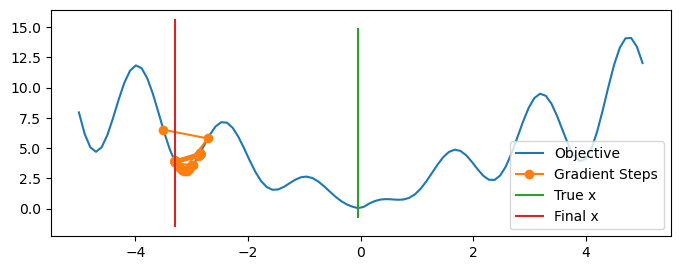

In [53]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.05,
                                      max_iter=150,
                                      init=-3.5)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

- In this case, it seems that the **step size** is so huge that the oscillation occurs and gradient descent even cannot reach a local minimum. Try with a smaller step size

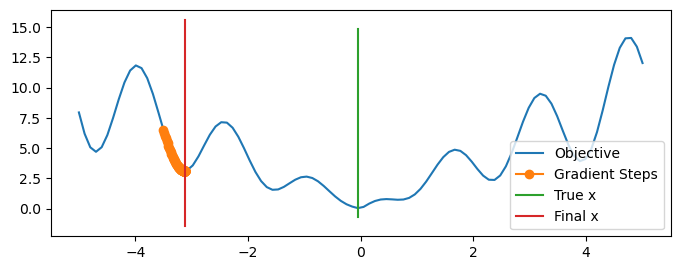

In [54]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.001,
                                      max_iter=150,
                                      init=-3.5)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

- With a smaller step size, it successfully converge to a local minimum. However, we would always look forward to a global minimum. 
- In this case, the **start point will affect final convergence**. Try with different start points

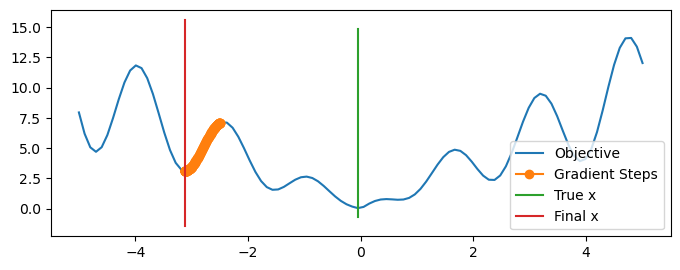

In [55]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.001,
                                      max_iter=150,
                                      init=-2.5)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

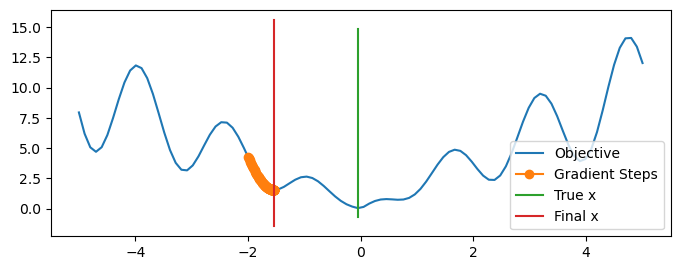

In [56]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.001,
                                      max_iter=150,
                                      init=-2)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

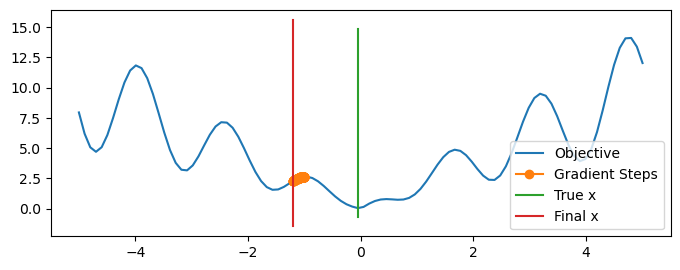

In [57]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.001,
                                      max_iter=150,
                                      init=-1)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

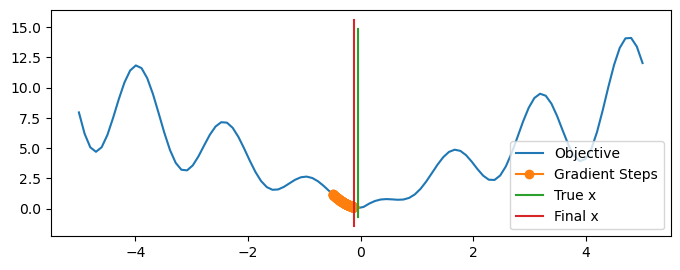

In [58]:
x_hat_arr, obj_arr = gradient_descent(Objective,
                                      step_size=0.001,
                                      max_iter=150,
                                      init=-0.5)
visualize_result(x_hat_arr,
                 obj_arr,
                 Objective,
                 x_true=x_true,
                 vis_arr=np.linspace(-5, 5, num=100))

- After several trials, we finally reaches the approximated location of global minimum. However, in complex optimization problems, we will not be able to select a best start point so easily by visualization, which **makes finding the global minimum very difficult**.